In [1]:
#Importación de librerías para uso dentro del taller
import numpy as np
import sklearn.neural_network as snn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Carga de datos para aálisis y visualización dentro de un DataFrame
mat = scipy.io.loadmat('Datos\HSEfeatures.mat')
df_heart = pd.DataFrame(mat['heart'])
df_heart

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.330670,0.339032,-0.942820,-0.707676,0.501767,-0.119639,-0.447719,1.783492,0.238308,-1.157191,...,-0.144814,-0.308339,-0.020249,0.654093,0.529630,1.324806,0.243527,-0.360307,-0.604145,0.0
1,0.331246,0.336737,-0.927206,-0.694687,0.508971,-0.120814,-0.453824,0.807546,-0.053670,-1.076089,...,0.080666,-0.798582,-0.299248,1.655671,0.700076,1.906129,-0.162199,0.057421,-0.283001,0.0
2,0.331770,0.344386,-0.923716,-0.682372,0.488986,-0.113470,-0.434460,1.313518,-0.162544,-1.002464,...,0.427350,0.263785,-0.124278,1.151582,0.466817,1.671573,1.312135,-0.573021,-0.209402,0.0
3,0.329360,0.331383,-0.953241,-0.699698,0.492007,-0.112001,-0.435856,1.026310,-0.231880,-1.094214,...,0.372958,-0.640030,-0.061730,1.428643,1.038850,1.715734,0.051105,0.244811,-0.728320,0.0
4,0.331467,0.347445,-0.898084,-0.699024,0.519661,-0.135503,-0.470572,1.593459,0.280987,-1.162752,...,0.349549,-1.186166,-0.042134,1.306349,0.369234,2.357850,0.228454,-0.395140,0.325261,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13010,0.329796,0.335972,-0.067817,-0.264521,0.485268,-0.103775,-0.425912,0.643281,1.059466,-0.040023,...,-0.170517,-0.147974,-0.444226,-1.437397,-2.121898,-0.682319,-1.355056,-0.945478,-0.405288,1.0
13011,0.325871,0.332148,0.028149,-0.124383,0.384878,0.019611,-0.277281,0.465123,0.631355,0.268552,...,-0.462190,-0.303439,-0.467052,-1.052174,-0.835221,-1.716542,-1.096898,-0.075286,-0.506575,1.0
13012,0.335031,0.330619,0.095754,-0.120581,0.469466,-0.079979,-0.399919,0.470818,0.412086,0.155175,...,-0.441631,-0.384267,-0.298002,-1.085332,-1.325630,-1.544695,-1.269211,-0.148572,-0.342583,1.0
13013,0.324724,0.328324,0.100724,-0.095183,0.388596,0.020198,-0.279723,0.416752,0.587947,0.345739,...,-0.516665,-0.417888,-0.956076,-1.821115,-1.441213,-0.424798,-2.293643,-0.136577,-0.697842,1.0


In [3]:
#Definición de X y Y
Y = mat['heart'][:,27]
X = mat['heart'][:,0:27]

In [4]:
#Separación en grupos de datos de prueba y entrenamiento
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)

In [5]:
#Modelo de Clasificación basado en Vecinos más Cercanos (Neighbors)
mdl = neighbors.KNeighborsClassifier(n_neighbors=1)
mdl.fit(Xtrain, Ytrain)
Ypred = mdl.predict(Xtest)
prediction_neighbors = np.array(Ypred)
np.all(prediction_neighbors == Ytest)

False

In [6]:
#Modelo de Clasificación basado en Regresión Lógica
mdl = LogisticRegression(max_iter=3000)
mdl.fit(Xtrain, Ytrain)
Ypred = mdl.predict(Xtest)
prediction_lRegression = np.array(Ypred)
np.all(prediction_lRegression == Ytest)

False

In [7]:
#Modelo de Clasificación basado en Redes Neuronales
mdl = snn.MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=1000)
mdl.fit(Xtrain, Ytrain)
Ypred = mdl.predict(Xtest)
prediction_nNetwork = np.array(Ypred)
np.all(prediction_nNetwork == Ytest)

False

In [8]:
#Visualización de tabla comparativa y cálculo de error de cada modelo
dict = {'Neighbors': prediction_neighbors,
        'Logistic Regression': prediction_lRegression,
        'Neural Network': prediction_nNetwork}

print(str(metrics.mean_squared_error(prediction_neighbors, Ytest)*100) + '%')
print(str(metrics.mean_squared_error(prediction_lRegression, Ytest)*100) + '%')
print(str(metrics.mean_squared_error(prediction_nNetwork, Ytest)*100) + '%')

df = pd.DataFrame(dict)
df

5.787451984635083%
13.77720870678617%
7.784891165172855%


,Neighbors,Logistic Regression,Neural Network
0,1.0,1.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
3900,1.0,1.0,1.0
3901,1.0,1.0,1.0
3902,1.0,1.0,1.0
3903,1.0,1.0,1.0


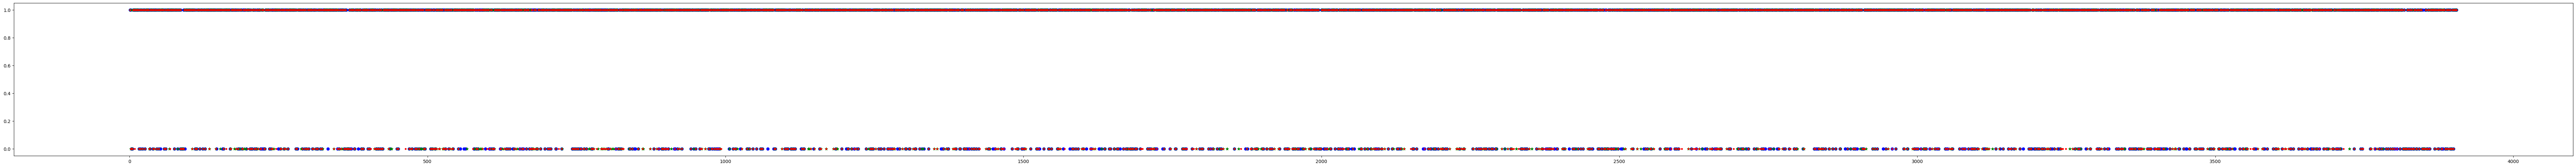

In [9]:
#Construcción de gráfica de predicciones da cada uno de los modelos
x = []
for i in range(1, len(prediction_neighbors)+1):
    x.append(i)

plt.figure(figsize=(100,6))
plt.scatter(x, prediction_lRegression, color="blue", marker="o")
plt.scatter(x, prediction_neighbors, color="green", marker="*")
plt.scatter(x, prediction_nNetwork, color="red", marker=".")